In [ ]:
pip install plotly_express

In [ ]:
pip install -U scikit-learn

[12944.38558167]
[[4622.07942153]]


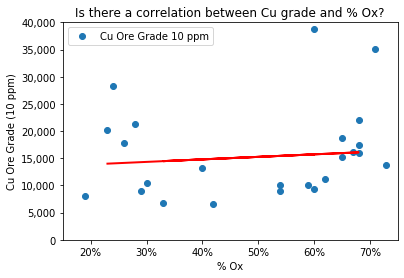

Mean Absolute Error: 9131.149338153957
Mean Squared Error: 122334541.17330696
Root Mean Squared Error: 11060.494617028073
Take away message: No Correlation


In [1]:
#https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

import pandas as pd  
import numpy as np
import scipy
from scipy import stats 


%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as seabornInstance

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


data = pd.read_csv(r'C:\Users\gcarlstedt\Documents\Work - Nevada Copper\Viable Mines\Ludwig\Python_Test.csv'
                   ,converters={'Cu Ore Grade 10 ppm':int,'% Ox':float})

df = pd.DataFrame(data)
stats = scipy.stats.linregress(df['% Ox'], df['Cu Ore Grade 10 ppm'])

#reshape.(-1, 1): Provides column as 1 but rows as unknown 
#'The new shape should be compatible with the original shape'
#Reshape your data using array.reshape(1, -1) if it contains a single sample --> Numpy Advice/Error Message

x = data['% Ox'].values.reshape(-1,1)
y = data['Cu Ore Grade 10 ppm'].values.reshape(-1,1)

#Make a 'Predicting Model' for Cu ore grade based upon % Ox (Machine Learning) 
#Splitting our data into two groups: Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

#Testing model and comparing predictions to actual results 
y_pred = regressor.predict(x_test)
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})


plot = df.plot(x ='% Ox', y = 'Cu Ore Grade 10 ppm', style ='o')  
plt.title('Is there a correlation between Cu grade and % Ox?')  
plt.xlabel('% Ox')  
plt.ylabel('Cu Ore Grade (10 ppm)') 
plt.xlim((.15, .75))
xvals = plot.get_xticks()
plot.set_xticklabels(['{:,.0%}'.format(x) for x in xvals])
plt.ylim((0,40000))
yvals = plot.get_yticks()
plot.set_yticklabels(['{:,.0f}'.format(y) for y in yvals])
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

#Measure of model quality. We are therefore able to say that, averagely, 
#our model predictions are off by approximately ~9000 (10 ppm)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

#The smaller the means squared error, the closer you are to finding the line of best fit. 
#Depending on your data, it may be impossible to get a very small value for the mean squared error
#Especially for data that is wildly scattered 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

#How concentrated the data is around the line of best fit
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('Take away message: No Correlation')

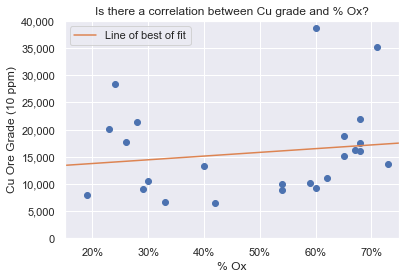

Slope:     6832.715883292693
Intercept: 12394.138737072228
R^2:       0.02450706132587832
Mean Absolute Error: 6599.867919331992
Mean Squared Error: 75872494.56099828
Root Mean Squared Error: 8710.481878805458
Take away message: No Correlation


In [2]:
#https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

#Python Data Science Handbook

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn import metrics


data = pd.read_csv(r'C:\Users\gcarlstedt\Documents\Work - Nevada Copper\Viable Mines\Ludwig\Python_Test.csv'
                   ,converters={'Cu Ore Grade 10 ppm':int,'% Ox':float})

df = pd.DataFrame(data)
x = df['% Ox'].values
y = df['Cu Ore Grade 10 ppm'].values

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

#x[;,np.nweaxis] == x = data['% Ox'].values.reshape(-1,1)
#x[;,np.nweaxis].shape = (26,1) and y.shape = (26,)
#Can broadcast both arrays etc. 
# xfit is required to be two-dimensional, hence the use of np.newaxis

#Calculate the optimal values of the weights 𝑏₀ and 𝑏₁, using the existing input and output (x and y) as the arguments. 
#In other words, .fit() fits the model. It returns self, which is the variable model itself
#𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥 :Finding line of best fit for the data

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(.15, .75, 26)
yfit = model.predict(xfit[:, np.newaxis])

plot = df.plot(x ='% Ox', y = 'Cu Ore Grade 10 ppm', style ='o', label = '')  
plt.title('Is there a correlation between Cu grade and % Ox?')  
plt.xlabel('% Ox')  
plt.ylabel('Cu Ore Grade (10 ppm)') 
plt.xlim((.15, .75))
xvals = plot.get_xticks()
plot.set_xticklabels(['{:,.0%}'.format(x) for x in xvals])
plt.ylim((0,40000))
yvals = plot.get_yticks()
plot.set_yticklabels(['{:,.0f}'.format(y) for y in yvals])
plt.plot(xfit, yfit, label='Line of best of fit');
plt.legend(loc= 0)
plt.show()


#The slope and intercept of the data are contained in the model's fit parameters, 
#which in Scikit-Learn are always marked by a trailing underscore

print("Slope:    ", model.coef_[0])
print("Intercept:", model.intercept_)
print("R^2:      ", model.score(x[:, np.newaxis], y))

#Measure of model quality. We are therefore able to say that, averagely, 
#our model predictions are off by approximately ~6599 (10 ppm)

print('Mean Absolute Error:', metrics.mean_absolute_error(y, yfit.flatten()))

#The smaller the means squared error, the closer you are to finding the line of best fit. 
#Depending on your data, it may be impossible to get a very small value for the mean squared error
#Especially for data that is wildly scattered 

print('Mean Squared Error:', metrics.mean_squared_error(y, yfit.flatten()))

#How concentrated the data is around the line of best fit

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, yfit.flatten())))

print('Take away message: No Correlation')

#For fun: Use 'model' predict values

y_pred = model.predict(x.reshape(-1,1))
#print('Predicted Response w/ known x values:', 
#      y_pred, sep='\n')

